<a href="https://colab.research.google.com/github/shyamalininba55/1b/blob/main/NN_activity_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2138 - val_loss: 0.0312
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0321 - val_loss: 0.0146
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0150 - val_loss: 0.0041
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0045 - val_loss: 0.0013
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.7027e-04 - val_loss: 9.9454e-04
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.3764e-04 - val_loss: 9.4663e-04
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.7180e-04 - val_loss: 9.8633e-04
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.1262e-04 - val_loss: 9.0226e-04
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.9897e-04 - val_loss: 9.3970e-04
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 

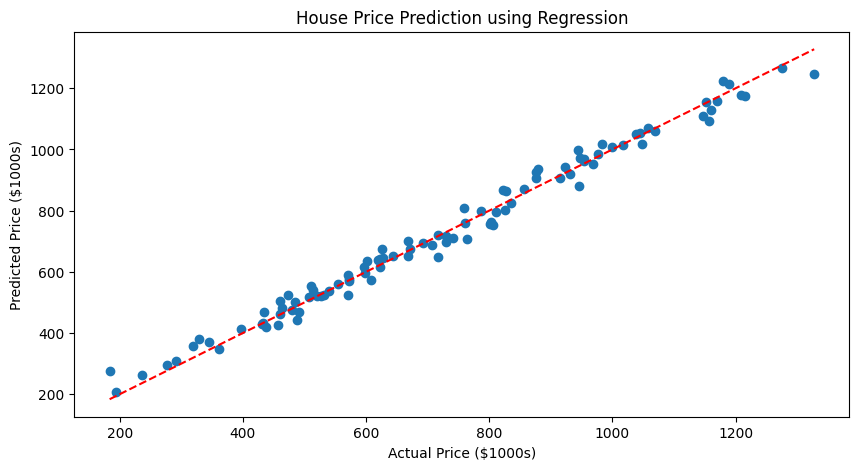

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
np.random.seed(42)
n_samples = 500
size = np.random.randint(500, 3500, n_samples)
bedrooms = np.random.randint(1, 6, n_samples)
age = np.random.randint(0, 30, n_samples)
price = (size * 0.3) + (bedrooms * 50) - (age * 2) + np.random.normal(0, 30, n_samples)
df = pd.DataFrame({
    "size": size,
    "bedrooms": bedrooms,
    "age": age,
    "price": price
})
X = df[["size", "bedrooms", "age"]].values
y = df["price"].values.reshape(-1, 1)


scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)
predictions_scaled = model.predict(X_test)
predictions = scaler_y.inverse_transform(predictions_scaled)
actual = scaler_y.inverse_transform(y_test)
plt.figure(figsize=(10,5))
plt.scatter(actual, predictions)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'r--')
plt.title("House Price Prediction using Regression")
plt.xlabel("Actual Price ($1000s)")
plt.ylabel("Predicted Price ($1000s)")
plt.show()
